In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import pronouncing
import copy
from textblob import TextBlob
import textstat
import pandas as pd
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import log_loss
from keras import models
from keras import layers
from keras import optimizers
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [69]:
X_train = df.text
y_train = df.author
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=0,test_size=.1)
X_test = test_df.text

In [16]:
nb = MultinomialNB()
tk = Tokenizer(lower = True,num_words=5000)
tfidf = TfidfVectorizer(stop_words='english',max_features=12000)
svm = SVC(kernel='linear')
encoder = LabelEncoder()

In [108]:
#Tf-Idf with svm
# X_tfidf_train = tfidf.fit_transform(X_train)
# X_tfidf_test = tfidf.transform(X_test)
# X_tfidf_val = tfidf.transform(X_val)
# svm.fit(X_tfidf_train,y_train_le)
# tfidf_train_preds =svm.predict(X_tfidf_train)
tfidf_test_preds =svm.predict(X_tfidf_test)
# tfidf_val_preds = svm.predict(X_tfidf_val)

In [78]:
#Tokenize text (255 characters, truncating post)
tk.fit_on_texts(df.text)
train_post = tk.texts_to_sequences(X_train)
X_train_post = pad_sequences(train_pre,255,truncating='post')
val_post = tk.texts_to_sequences(X_val)
X_val_post = pad_sequences(val_pre,255,truncating='post')
test_post = tk.texts_to_sequences(test_df.text)
X_test_post = pad_sequences(test_pre,255,truncating='post')

tk.fit_on_texts(X_train)
train_pre = tk.texts_to_sequences(X_train)
X_train_pre = pad_sequences(train_pre,255,truncating='pre')
val_pre = tk.texts_to_sequences(X_val)
X_val_pre = pad_sequences(val_pre,255,truncating='pre')
test_pre = tk.texts_to_sequences(X_test)
X_test_pre = pad_sequences(test_pre,255,truncating='pre')

#reformat y
y_train_le = encoder.fit_transform(y_train)
y_val_le = encoder.fit_transform(y_val)
y_train_dmy = pd.get_dummies(y_train)
y_val_dmy = pd.get_dummies(y_val)

In [79]:
#get clusters with dropped columns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tqdm
def clustering(X_train,X_val, X_test,n_clusters=15):
    Sum_of_squared_distances = []
    K = range(1,n_clusters)
    for k in tqdm.tqdm(K):
        km = KMeans(n_clusters=k)
        km = km.fit(X_train)
        Sum_of_squared_distances.append(km.inertia_)
    fig= plt.figure(figsize=(6,3))
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    num = input('Num clusters?')
    km = KMeans(n_clusters=int(num))
    train_clusters = km.fit_predict(X_train)
    val_clusters = km.fit_predict(X_val)
    test_clusters = km.fit_predict(X_test)
    return train_clusters, val_clusters, test_clusters


100%|██████████| 29/29 [02:07<00:00,  6.51s/it]


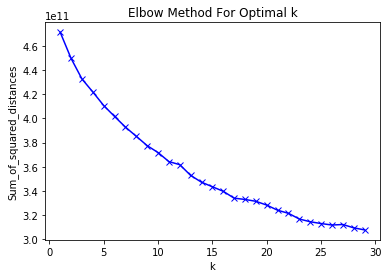

Num clusters?17


100%|██████████| 29/29 [02:18<00:00,  6.94s/it]


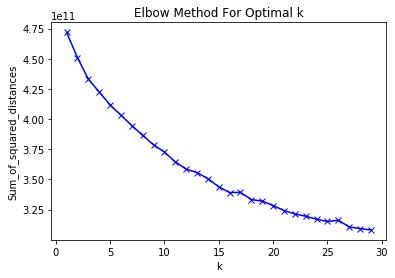

Num clusters?16


In [80]:
#KMeans clustering
train_clusters_post, val_clusters_post, test_clusters_post = clustering(X_train_post,X_val_post,X_test_post,n_clusters=30)
train_clusters_pre, val_clusters_pre, test_clusters_pre = clustering(X_train_pre,X_val_pre,X_test_pre,n_clusters=30)

In [86]:
#get cluster dummies
train_clusters_dmy = pd.get_dummies(pd.DataFrame({'Cluster':train_clusters}),drop_first=True,prefix='Cluster')
val_clustesr_dmy = pd.get_dummies(pd.DataFrame({'Cluster':val_clusters}),drop_first=True,prefix='Cluster')
train_clusters_dmy = pd.get_dummies(pd.DataFrame({'Cluster':train_clusters}),drop_first=True,prefix='Cluster')
test_clustesr_dmy = pd.get_dummies(pd.DataFrame({'Cluster':test_clusters}),drop_first=True,prefix='Cluster')

In [81]:
#Multinomial naive bayes
nb.fit(X_train_post,y_train_le)
nb_post_train_preds = nb.predict(X_train_post)
nb_post_test_preds = nb.predict(X_test_post)
nb_post_val_preds = nb.predict(X_val_post)
nb.fit(X_train_pre,y_train_le)
nb_pre_train_preds = nb.predict(X_train_pre)
nb_pre_test_preds = nb.predict(X_test_pre)
nb_pre_val_preds = nb.predict(X_val_pre)

In [98]:
train_clusters_post.shape

(17621,)

In [99]:
train_le

,NB_pre,NB_post,TFIDF,Cluster_post,Cluster_pre
0,1,1,0,3,10
1,1,1,2,7,2
2,1,1,1,13,11
3,0,2,0,8,4
4,1,2,1,11,13
5,1,1,1,3,3
6,1,1,2,11,13
7,0,0,0,4,6
8,1,1,0,7,2
9,1,1,1,15,5


In [100]:
#Combine
train_le =pd.DataFrame({'NB_pre':nb_pre_train_preds,'NB_post':nb_post_train_preds,'TFIDF':tfidf_train_preds,\
                        'Cluster_post':train_clusters_post,'Cluster_pre':train_clusters_pre})
train_dmy = pd.DataFrame(None,index=train_le.index)
for col in train_le.columns:
    train_dmy = train_dmy.join(pd.get_dummies(train_le[col].astype(str),drop_first=True,prefix=col) )        
val_le =pd.DataFrame({'NB_pre':nb_pre_val_preds,'NB_post':nb_post_val_preds,'TFIDF':tfidf_val_preds,\
                        'Cluster_post':val_clusters_post,'Cluster_pre':val_clusters_pre})
val_dmy = pd.DataFrame(None,index=val_le.index)
for col in val_le.columns:
    val_dmy = val_dmy.join(pd.get_dummies(val_le[col].astype(str),drop_first=True,prefix=col) )
test_le =pd.DataFrame({'NB_pre':nb_pre_test_preds,'NB_post':nb_post_test_preds,'TFIDF':tfidf_test_preds,\
                        'Cluster_post':test_clusters_post,'Cluster_pre':test_clusters_pre})
test_dmy = pd.DataFrame(None,index=test_le.index)
for col in test_le.columns:
    test_dmy = test_dmy.join(pd.get_dummies(test_le[col].astype(str),drop_first=True,prefix=col) )                                            

In [92]:
#bagged lstm for post tokens
num_words = 5000
embed_vec_len = 32
max_sequence_len = 255
lstm_nn = models.Sequential()
lstm_nn.add(layers.Embedding(num_words, embed_vec_len, input_length=max_sequence_len))
lstm_nn.add(layers.SpatialDropout1D(0.2))
lstm_nn.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_nn.add(layers.Dense(3, activation='softmax'))
checkpoint = ModelCheckpoint('255post.best.hdf5',  verbose=1, save_best_only=True, mode='auto')
lstm_nn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
filepaths = []
counter = 0
while counter < 10:
    print(counter+1)
    sub = random.sample(range(len(X_train_post)),k=5000)
    filepath = '255post'+str(counter)+'.best.hdf5'
    filepaths.append(filepath)
    checkpoint = ModelCheckpoint(filepath,  verbose=1, save_best_only=True, mode='auto')
    lstm_nn.fit(X_train_post[sub],y_train_dmy.iloc[sub,:],epochs=5,batch_size=256, validation_data=(X_val_post,y_val_dmy), callbacks=[checkpoint])
    counter += 1
nn_val_preds = []
nn_train_preds = []
nn_test_preds = []
for filepath in tqdm.tqdm(filepaths):
    lstm_nn = models.Sequential()
    lstm_nn.add(layers.Embedding(num_words, embed_vec_len, input_length=max_sequence_len))
    lstm_nn.add(layers.SpatialDropout1D(0.2))
    lstm_nn.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    lstm_nn.add(layers.Dense(3, activation='softmax'))
    lstm_nn.load_weights(filepath)
    lstm_nn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    nn_train_preds.append(lstm_nn.predict(X_train_post))
    nn_val_preds.append(lstm_nn.predict(X_val_post))
    nn_test_preds.append(lstm_nn.predict(X_test_post))
nn_train_post_mean = np.asarray(nn_train_preds).mean(axis=0)[:,1:]
nn_test_post_mean = np.asarray(nn_test_preds).mean(axis=0)[:,1:]
nn_val_post_mean = np.asarray(nn_val_preds).mean(axis=0)[:,1:]

1


/Users/remycanario/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5000 samples, validate on 1958 samples
Epoch 1/5
5000/5000 [==============================] - 18s 4ms/step - loss: 1.0764 - accuracy: 0.4090 - val_loss: 1.0514 - val_accuracy: 0.4663

Epoch 00001: val_loss improved from inf to 1.05143, saving model to 255post0.best.hdf5
Epoch 2/5
5000/5000 [==============================] - 17s 3ms/step - loss: 1.0223 - accuracy: 0.5064 - val_loss: 0.9759 - val_accuracy: 0.5613

Epoch 00002: val_loss improved from 1.05143 to 0.97595, saving model to 255post0.best.hdf5
Epoch 3/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.9186 - accuracy: 0.5884 - val_loss: 0.9492 - val_accuracy: 0.5271

Epoch 00003: val_loss improved from 0.97595 to 0.94919, saving model to 255post0.best.hdf5
Epoch 4/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.8122 - accuracy: 0.6630 - val_loss: 0.8709 - val_accuracy: 0.5981

Epoch 00004: val_loss improved from 0.94919 to 0.87094, saving model to 255post0.best.hdf5
Epoch 5/5
50

5000/5000 [==============================] - 18s 4ms/step - loss: 0.2685 - accuracy: 0.9046 - val_loss: 0.5349 - val_accuracy: 0.7962

Epoch 00002: val_loss improved from 0.53701 to 0.53488, saving model to 255post7.best.hdf5
Epoch 3/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2487 - accuracy: 0.9120 - val_loss: 0.5781 - val_accuracy: 0.8059

Epoch 00003: val_loss did not improve from 0.53488
Epoch 4/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.2272 - accuracy: 0.9194 - val_loss: 0.5696 - val_accuracy: 0.8049

Epoch 00004: val_loss did not improve from 0.53488
Epoch 5/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1904 - accuracy: 0.9354 - val_loss: 0.5955 - val_accuracy: 0.7993

Epoch 00005: val_loss did not improve from 0.53488
9
Train on 5000 samples, validate on 1958 samples
Epoch 1/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.3126 - accuracy: 0.8836 - val_loss: 0.5439 - val_accuracy:



  0%|          | 0/10 [00:00<?, ?it/s]


Epoch 00005: val_loss did not improve from 0.55785




 10%|█         | 1/10 [00:26<04:01, 26.87s/it]

 20%|██        | 2/10 [00:53<03:33, 26.72s/it]

 30%|███       | 3/10 [01:19<03:06, 26.66s/it]

 40%|████      | 4/10 [01:46<02:40, 26.83s/it]

 50%|█████     | 5/10 [02:12<02:12, 26.57s/it]

 60%|██████    | 6/10 [02:37<01:43, 25.94s/it]

 70%|███████   | 7/10 [03:04<01:18, 26.13s/it]

 80%|████████  | 8/10 [03:30<00:52, 26.26s/it]

 90%|█████████ | 9/10 [03:58<00:26, 26.71s/it]

100%|██████████| 10/10 [04:23<00:00, 26.35s/it]

In [93]:
#bagged lstm for pre tokens
num_words = 5000
embed_vec_len = 32
max_sequence_len = 255
lstm_nn = models.Sequential()
lstm_nn.add(layers.Embedding(num_words, embed_vec_len, input_length=max_sequence_len))
lstm_nn.add(layers.SpatialDropout1D(0.2))
lstm_nn.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_nn.add(layers.Dense(3, activation='softmax'))
checkpoint = ModelCheckpoint(filepath,  verbose=1, save_best_only=True, mode='auto')
lstm_nn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
filepaths = []
counter = 0
while counter < 10:
    print(counter+1)
    sub = random.sample(range(len(X_train_pre)),k=5000)
    filepath = '255pre'+str(counter)+'.best.hdf5'
    filepaths.append(filepath)
    checkpoint = ModelCheckpoint(filepath,  verbose=1, save_best_only=True, mode='auto')
    lstm_nn.fit(X_train_pre[sub],y_train_dmy.iloc[sub,:],epochs=3,batch_size=256, validation_data=(X_val_pre,y_val_dmy), callbacks=[checkpoint])
    counter += 1
nn_val_preds = []
nn_train_preds = []
nn_test_preds = []
for filepath in tqdm.tqdm(filepaths):
    lstm_nn = models.Sequential()
    lstm_nn.add(layers.Embedding(num_words, embed_vec_len, input_length=max_sequence_len))
    lstm_nn.add(layers.SpatialDropout1D(0.2))
    lstm_nn.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    lstm_nn.add(layers.Dense(3, activation='softmax'))
    lstm_nn.load_weights(filepath)
    lstm_nn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    nn_train_preds.append(lstm_nn.predict(X_train_pre))
    nn_val_preds.append(lstm_nn.predict(X_val_pre))
    nn_test_preds.append(lstm_nn.predict(X_test_pre))
nn_train_pre_mean = np.asarray(nn_train_preds).mean(axis=0)[:,1:]
nn_test_pre_mean = np.asarray(nn_test_preds).mean(axis=0)[:,1:]
nn_val_pre_mean = np.asarray(nn_val_preds).mean(axis=0)[:,1:]

1


/Users/remycanario/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5000 samples, validate on 1958 samples
Epoch 1/3
5000/5000 [==============================] - 18s 4ms/step - loss: 1.0776 - accuracy: 0.4068 - val_loss: 1.0565 - val_accuracy: 0.4152

Epoch 00001: val_loss improved from inf to 1.05648, saving model to 255pre0.best.hdf5
Epoch 2/3
5000/5000 [==============================] - 18s 4ms/step - loss: 1.0294 - accuracy: 0.5214 - val_loss: 0.9960 - val_accuracy: 0.5562

Epoch 00002: val_loss improved from 1.05648 to 0.99599, saving model to 255pre0.best.hdf5
Epoch 3/3
5000/5000 [==============================] - 18s 4ms/step - loss: 0.9202 - accuracy: 0.6230 - val_loss: 0.8582 - val_accuracy: 0.6435

Epoch 00003: val_loss improved from 0.99599 to 0.85819, saving model to 255pre0.best.hdf5
2
Train on 5000 samples, validate on 1958 samples
Epoch 1/3
5000/5000 [==============================] - 18s 4ms/step - loss: 0.8175 - accuracy: 0.6582 - val_loss: 0.7913 - val_accuracy: 0.6762

Epoch 00001: val_loss improved from inf to 0.79131, savi



  0%|          | 0/10 [00:00<?, ?it/s]


Epoch 00003: val_loss did not improve from 0.50798




 10%|█         | 1/10 [00:26<04:02, 26.91s/it]

 20%|██        | 2/10 [00:53<03:34, 26.87s/it]

 30%|███       | 3/10 [01:23<03:13, 27.61s/it]

 40%|████      | 4/10 [01:50<02:45, 27.58s/it]

 50%|█████     | 5/10 [02:16<02:15, 27.02s/it]

 60%|██████    | 6/10 [02:42<01:46, 26.65s/it]

 70%|███████   | 7/10 [03:07<01:18, 26.33s/it]

 80%|████████  | 8/10 [03:34<00:52, 26.36s/it]

 90%|█████████ | 9/10 [03:58<00:25, 25.92s/it]

100%|██████████| 10/10 [04:24<00:00, 25.71s/it]

In [110]:
train_nlp_df = train_dmy.join(pd.DataFrame(nn_train_pre_mean,columns=('LSTM_pre_1','LSTM_pre_2')))
val_nlp_df = val_dmy.join(pd.DataFrame(nn_val_pre_mean,columns=('LSTM_pre_1','LSTM_pre_2')))
test_nlp_df = test_dmy.join(pd.DataFrame(nn_test_pre_mean,columns=('LSTM_pre_1','LSTM_pre_2')))

In [112]:
train_nlp_df.to_csv('nlp_df_train.csv')
val_nlp_df.to_csv('nlp_df_val.csv')
test_nlp_df.to_csv('nlp_df_test.csv')

NameError: name 'test_nlp_df' is not defined

In [89]:
output_train_dict = ({'LSTM_pre':nn_train_pre_mean,'LSTM_post':nn_train_pre_mean,\
                         'NB_pre':nb_pre_train_preds,'NB_post':nb_post_train_preds,'TFIDF':tfidf_train_preds})

In [75]:
val_loss_50 =[]
counter = 0
bag_nn_preds_50 = []
val_preds_50 = []
test_preds_50 = []
while counter < 20:
    print(counter+1)
    sub = random.sample(range(len(X_split_50)),k=15000)
    val = [i for i in range(len(X_split_50)) if i not in sub]
    history = lstm_nn.fit(X_split_50[sub],y_train_50.iloc[sub,:],epochs=1,batch_size=256, validation_data=(X_val_50,y_val_50))
    val_loss_50.append(1-history.history['val_loss'][0])
    bag_nn_preds_50.append(lstm_nn.predict(X_train_50))
    val_preds_50.append(lstm_nn.predict(X_val_50))
    test_preds_50.append(lstm_nn.predict(X_test_50))
    counter += 1
weights_50 = np.array([i/sum(val_loss_50) for i in val_loss_50])
arr_50 = np.zeros(np.array(bag_nn_preds_50).shape)
val_arr_50 = np.zeros(np.array(val_preds_50).shape)
test_arr_50 = np.zeros(np.array(test_preds_50).shape)
for i in range(len(weights)):
    arr_50[i]=weights[i]*np.array(bag_nn_preds_50)[i]
    val_arr_50[i]=weights[i]*np.array(val_preds_50)[i]
    test_arr_50[i]=weights[i]*np.array(test_preds_50)[i]
bnp_50_lstm_pre = np.mean(arr_50, axis=0)
val_bnp_50_lstm_pre = np.mean(val_arr_50, axis=0)
test_bnp_50_lstm_pre = np.mean(test_arr_50, axis=0)

1
Train on 15000 samples, validate on 1958 samples
Epoch 1/1
15000/15000 [==============================] - 11s 752us/step - loss: 1.0891 - acc: 0.4010 - val_loss: 1.0855 - val_acc: 0.4137
2
Train on 15000 samples, validate on 1958 samples
Epoch 1/1
15000/15000 [==============================] - 8s 544us/step - loss: 1.0855 - acc: 0.4031 - val_loss: 1.0885 - val_acc: 0.4137
3
Train on 15000 samples, validate on 1958 samples
Epoch 1/1
15000/15000 [==============================] - 8s 553us/step - loss: 1.0782 - acc: 0.4071 - val_loss: 1.0936 - val_acc: 0.4040
4
Train on 15000 samples, validate on 1958 samples
Epoch 1/1
15000/15000 [==============================] - 8s 552us/step - loss: 1.0650 - acc: 0.4269 - val_loss: 1.1047 - val_acc: 0.3687
5
Train on 15000 samples, validate on 1958 samples
Epoch 1/1
15000/15000 [==============================] - 8s 548us/step - loss: 1.0463 - acc: 0.4547 - val_loss: 1.1145 - val_acc: 0.3580
6
Train on 15000 samples, validate on 1958 samples
Epoch 1/